# /*******************************************************
* Copyright         : 2022 Vaibhav Khandare
* Description       : This file content prediction of churn datatset using Sequential
*                    
* Revision History  :
* 		Author 		
        Vaibhav Khandare 
* ------------------------------------------------------------------
/******************************************************************/

In [ ]:
import pandas as pd

In [2]:
db = pd.read_csv("Churn_Modelling.csv")

In [3]:
db.shape

(10000, 14)

In [4]:
db.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
db.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
db.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [8]:
y = db['Exited']

In [9]:
x = db[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary' ]]

In [10]:
geo = db['Geography']

In [11]:
geo = pd.get_dummies(geo, drop_first=True)

In [12]:
gender = db['Gender']

In [13]:
gender = pd.get_dummies(gender,drop_first=True)

In [14]:
#axis=1 means column
x_final = pd.concat([x,gender,geo], axis=1)

In [15]:
x_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [16]:
from  sklearn.model_selection  import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.20, random_state=42)

In [18]:
x_train.shape

(8000, 11)

In [19]:
x_test.shape

(2000, 11)

In [20]:
from  keras.models  import Sequential

In [21]:
model  = Sequential()

In [22]:
model.get_config()

{'name': 'sequential', 'layers': []}

In [23]:
from  keras.layers  import Dense

In [24]:
model.add ( Dense(units=8, 
                  input_dim=11 , 
                  activation='relu',
            
                 ))
"""
    kernel_initializer="zeros",  
      bias_initializer="ones" 
    
"""

'\n    kernel_initializer="zeros",  \n      bias_initializer="ones" \n    \n'

In [25]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.get_layer("dense").get_weights()

[array([[-0.17964369,  0.34126645, -0.3277542 , -0.34663355, -0.21377179,
         -0.41842884,  0.0330072 ,  0.05340886],
        [ 0.42841727, -0.38173288,  0.33813763, -0.23620775,  0.4654606 ,
         -0.08456007,  0.20331925,  0.40623736],
        [-0.28894216, -0.2172625 ,  0.548582  , -0.17690018,  0.40433604,
         -0.04973257, -0.3015617 , -0.10608134],
        [ 0.39044714,  0.25315833,  0.03000206, -0.48610437,  0.31744957,
          0.30839038,  0.53310305,  0.11561483],
        [-0.3127032 ,  0.34409595, -0.42274323,  0.1002062 , -0.28938147,
          0.55012566, -0.01261151, -0.2448555 ],
        [ 0.4427051 , -0.25114742,  0.35040063,  0.23549283, -0.01592094,
         -0.30813876, -0.35917455,  0.01400733],
        [-0.5431765 ,  0.22758538, -0.45541322,  0.3180908 , -0.17849535,
          0.44195873, -0.52720666,  0.29488176],
        [ 0.1360932 ,  0.21422583, -0.06070858,  0.21494842, -0.42247432,
         -0.15671387,  0.33750737,  0.16231626],
        [-0.0566

In [28]:
model.add ( Dense(units=6, 
                  
                  activation='relu',
                  
                 ))


In [29]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 6,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initiali

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.get_layer("dense_1").get_weights()

[array([[ 0.3645966 ,  0.04183722,  0.23510462, -0.39158985, -0.53606176,
         -0.2604443 ],
        [ 0.3433116 ,  0.5755259 ,  0.5086266 , -0.12342447,  0.1350708 ,
         -0.59745145],
        [ 0.16127896, -0.4605322 , -0.42672318, -0.39030436, -0.59676456,
         -0.22501972],
        [ 0.5629728 , -0.03199923,  0.10161835,  0.05900073, -0.62448746,
          0.30039012],
        [ 0.2719007 ,  0.31371713, -0.35900453,  0.03677642,  0.20876944,
         -0.2954954 ],
        [ 0.44162583, -0.4649521 ,  0.02493948,  0.3853619 , -0.40185627,
          0.46965778],
        [ 0.39088356,  0.44343317, -0.12383389, -0.34179294, -0.12578225,
         -0.34478754],
        [ 0.57221746,  0.12821418, -0.62470645, -0.08241719,  0.34113616,
          0.44213486]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32)]

In [32]:
model.add ( 
    
    Dense(
        units=1, 
        activation='sigmoid',
        
             )
)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.get_layer("dense_3").get_weights()

ValueError: No such layer: dense_3.

In [35]:
from keras.optimizers import Adam

In [36]:
#Use this cross-entropy loss for binary (0 or 1) classification applications. ... y_pred (predicted value): This is the model's prediction.
model.compile(loss="binary_crossentropy",  optimizer=Adam(learning_rate=0.01), metrics=["accuracy"]  )

In [37]:
model.get_weights()

[array([[-0.17964369,  0.34126645, -0.3277542 , -0.34663355, -0.21377179,
         -0.41842884,  0.0330072 ,  0.05340886],
        [ 0.42841727, -0.38173288,  0.33813763, -0.23620775,  0.4654606 ,
         -0.08456007,  0.20331925,  0.40623736],
        [-0.28894216, -0.2172625 ,  0.548582  , -0.17690018,  0.40433604,
         -0.04973257, -0.3015617 , -0.10608134],
        [ 0.39044714,  0.25315833,  0.03000206, -0.48610437,  0.31744957,
          0.30839038,  0.53310305,  0.11561483],
        [-0.3127032 ,  0.34409595, -0.42274323,  0.1002062 , -0.28938147,
          0.55012566, -0.01261151, -0.2448555 ],
        [ 0.4427051 , -0.25114742,  0.35040063,  0.23549283, -0.01592094,
         -0.30813876, -0.35917455,  0.01400733],
        [-0.5431765 ,  0.22758538, -0.45541322,  0.3180908 , -0.17849535,
          0.44195873, -0.52720666,  0.29488176],
        [ 0.1360932 ,  0.21422583, -0.06070858,  0.21494842, -0.42247432,
         -0.15671387,  0.33750737,  0.16231626],
        [-0.0566

In [38]:
model.fit(x_train , y_train, epochs =100  )

Epoch 1/100
250/250 [==============================] - 22s 2ms/step - loss: 1056.1021 - accuracy: 0.6568
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 222.3014 - accuracy: 0.6661
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 156.5190 - accuracy: 0.6827
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 129.6456 - accuracy: 0.6965
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 119.9302 - accuracy: 0.6710
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 102.1250 - accuracy: 0.7016
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 46.7025 - accuracy: 0.6798
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 47.4648 - accuracy: 0.6748
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 33.2044 - accuracy: 0.7300
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss

In [39]:
model.get_weights()

[array([[-3.0973902e-01, -1.2686548e-01, -3.9043263e-01, -6.0125041e-01,
         -7.0274776e-01, -3.2523641e-01, -7.7398700e-01,  3.3056676e-02],
        [-7.9797971e-01,  6.8844903e-01,  3.0170509e-01, -1.3983307e+00,
          2.0626590e+00, -2.1625605e+00,  1.3870645e+00, -1.0296950e+00],
        [-3.8052902e-01, -6.9142330e-01,  5.0078124e-01, -3.2789165e-01,
         -2.3558545e-01,  7.3988654e-02, -1.1621366e+00,  1.1310101e-01],
        [ 1.3727091e-03,  3.1064483e-04, -3.9437488e-02, -1.2538141e-01,
          2.2054883e-03,  2.0441778e-03,  1.9230907e-03, -2.6799958e-02],
        [-6.6027147e-01,  1.3747010e-03, -4.8898888e-01,  4.5763263e-01,
          6.7752294e-02, -2.9367596e-01, -5.6495911e-01,  2.8681636e-01],
        [ 3.0900955e-01, -7.2682518e-01,  2.7922365e-01, -5.6590658e-02,
         -5.7575178e-01, -1.6411057e-01, -1.1939354e+00, -5.6986634e-02],
        [ 1.3573247e+00, -3.0868890e+00, -4.8129246e-01,  1.6205097e+00,
         -5.0141745e+00,  4.9791694e+00, -5.1

In [40]:
l =  pd.DataFrame(model.history.history)

In [41]:
a = model.history.history['accuracy']

In [42]:
l1  = model.history.history['loss']

In [43]:
l1= pd.DataFrame(l1)

In [44]:
type(a)

list

In [45]:
a1= pd.DataFrame(a)

In [46]:
type(a1)

pandas.core.frame.DataFrame

<AxesSubplot:>

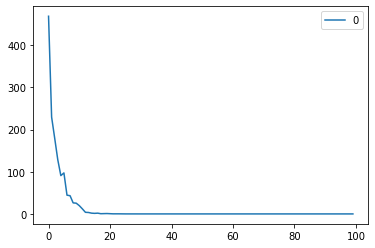

In [47]:
l1.plot()

In [50]:
x_final.iloc[0].values

array([6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00])

In [51]:
model.predict([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00]])

array([[0.2084772]], dtype=float32)